*#C[SiH2]C#Cc1cccc(C#*)c1


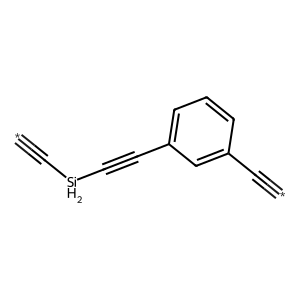

In [17]:
import rdkit
psmiles = '[*]#C[SiH2]C#Cc1cccc(C#[*])c1'
mol = rdkit.Chem.MolFromSmiles(psmiles, sanitize=True)

from rdkit.Chem import MolToSmiles, Draw #可视化分子
print(MolToSmiles(mol))
Draw.MolToImage(mol)

In [18]:
#如何使用mol对象查看每个原子的信息
for atom in mol.GetAtoms():
    print(atom.GetIdx(), atom.GetSymbol(), atom.GetAtomicNum(), atom.GetDegree(), atom.GetHybridization(), atom.GetIsAromatic())

0 * 0 1 UNSPECIFIED False
1 C 6 2 SP False
2 Si 14 2 SP3 False
3 C 6 2 SP False
4 C 6 2 SP False
5 C 6 3 SP2 True
6 C 6 2 SP2 True
7 C 6 2 SP2 True
8 C 6 2 SP2 True
9 C 6 3 SP2 True
10 C 6 2 SP False
11 * 0 1 UNSPECIFIED False
12 C 6 2 SP2 True


In [19]:
#如何使用mol对象查看每个键的信息
for bond in mol.GetBonds():
    print(bond.GetBeginAtomIdx(), bond.GetEndAtomIdx(), bond.GetBondType(), bond.IsInRing())

0 1 TRIPLE False
1 2 SINGLE False
2 3 SINGLE False
3 4 TRIPLE False
4 5 SINGLE False
5 6 AROMATIC True
6 7 AROMATIC True
7 8 AROMATIC True
8 9 AROMATIC True
9 10 SINGLE False
10 11 TRIPLE False
9 12 AROMATIC True
12 5 AROMATIC True


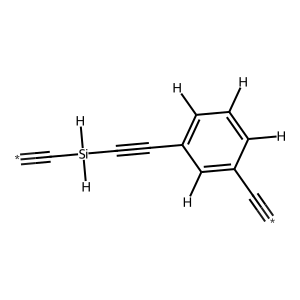

In [20]:
from rdkit import Chem
from rdkit.Chem import AllChem

psmiles = "[*]#C[SiH2]C#Cc1cccc(C#[*])c1" 
mol = Chem.MolFromSmiles(psmiles)
mol = Chem.AddHs(mol)  # 将隐式氢转换为显示氢

Draw.MolToImage(mol)

In [21]:
params = AllChem.ETKDGv3()
params.randomSeed = 42
AllChem.EmbedMolecule(mol, params) # 生成初始3D构象
AllChem.MMFFOptimizeMolecule(mol) # 使用MMFF力场优化3D构象

sdf = Chem.MolToMolBlock(mol)
with open("polymer_fragment.sdf", "w") as f:
    f.write(sdf)

[20:56:50] UFFTYPER: Unrecognized atom type: *_ (0)
[20:56:50] UFFTYPER: Unrecognized atom type: *_ (11)


In [22]:
from rdkit import Chem
from rdkit.Chem import AllChem, Draw

psmiles = "[*]#C[SiH2]C#Cc1cccc(C#[*])c1"
mol = Chem.MolFromSmiles(psmiles)

# 1. 把所有星号替换成甲基（会自动保留与原邻居的单键）
methyl = Chem.MolFromSmiles("C")            # 等价于 CH4
mol = Chem.ReplaceSubstructs(mol, Chem.MolFromSmarts("[*]"), methyl, replaceAll=True)[0]

# 2. 标准化并补氢
Chem.SanitizeMol(mol)
mol = Chem.AddHs(mol)

# 3. 3D 嵌入 + 力场优化
params = AllChem.ETKDGv3()
params.randomSeed = 42
AllChem.EmbedMolecule(mol, params)
AllChem.MMFFOptimizeMolecule(mol)

# 4. 可视化或导出
img = Draw.MolToImage(Chem.RemoveHs(mol))
img.show()

with open("polymer_methylated.sdf", "w") as f:
    f.write(Chem.MolToMolBlock(mol))


In [23]:
#如何可视化观看sdf文件
import py3Dmol
from rdkit import Chem

mol = Chem.SDMolSupplier("polymer_methylated.sdf", removeHs=False)[0]
block = Chem.MolToMolBlock(mol)

view = py3Dmol.view(width=400, height=300)
view.addModel(block, "sdf")
view.setStyle({"stick": {}})
view.zoomTo()
view.show()



3Dmol.js failed to load for some reason. Please check your browser console for error messages.

In [24]:
#如何使用mol对象查看每个原子的信息
for atom in mol.GetAtoms():
    print(atom.GetIdx(), atom.GetSymbol(), atom.GetAtomicNum(), atom.GetDegree(), atom.GetHybridization(), atom.GetIsAromatic())

0 C 6 2 SP False
1 C 6 2 SP False
2 C 6 4 SP3 False
3 C 6 2 SP False
4 C 6 2 SP False
5 C 6 3 SP2 True
6 C 6 3 SP2 True
7 C 6 3 SP2 True
8 C 6 3 SP2 True
9 C 6 3 SP2 True
10 C 6 2 SP False
11 C 6 2 SP False
12 C 6 3 SP2 True
13 H 1 1 S False
14 H 1 1 S False
15 H 1 1 S False
16 H 1 1 S False
17 H 1 1 S False
18 H 1 1 S False
19 H 1 1 S False
20 H 1 1 S False


In [25]:
from PSMILES_to_graph import graph_from_psmiles
psmiles = "[*]/C(=C(/[*])c1ccc(C(C)(C)C)cc1)c1ccccc1"
graph = graph_from_psmiles(psmiles)
print(graph['node_feats'])

    atomic_num  degree  formal_charge  is_aromatic         x         y  \
0          0.0     1.0            0.0          0.0  0.398915  2.331062   
1          6.0     3.0            0.0          0.0 -1.460760  0.423622   
2          6.0     3.0            0.0          0.0  0.006011  0.243653   
3          0.0     1.0            0.0          0.0  0.398915  2.331062   
4          6.0     3.0            0.0          1.0  2.217725  1.191033   
5          6.0     3.0            0.0          1.0  2.818726 -0.079373   
6          6.0     3.0            0.0          1.0  4.343454 -0.299213   
7          6.0     3.0            0.0          1.0  4.857075 -0.858496   
8          6.0     4.0            0.0          0.0  4.657662 -1.306193   
9          6.0     4.0            0.0          0.0  5.128671  1.000570   
10         6.0     4.0            0.0          0.0  1.968867 -1.177866   
11         6.0     4.0            0.0          0.0  0.583991 -1.017076   
12         6.0     3.0            0.0 

/opt/anaconda3/envs/py38/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [26]:
print(graph['edge_index'])

     0   1   2   3   4   5   6   7   8   9   ...  32  33  34  35  36  37  38  \
row   0   1   1   2   2   3   2   4   4   5  ...  16  17  17  18  18  19  13   
col   1   0   2   1   3   2   4   2   5   4  ...  17  16  18  17  19  18   4   

     39  40  41  
row   4  19  14  
col  13  14  19  

[2 rows x 42 columns]


In [27]:
print(graph['edge_attr'])

    bond_type  is_conjugated  is_in_ring  bond_length
0         1.0            0.0         0.0     2.706186
1         1.0            0.0         0.0     2.706186
2         2.0            0.0         0.0     1.481160
3         2.0            0.0         0.0     1.481160
4         1.0            0.0         0.0     2.157091
5         1.0            0.0         0.0     2.157091
6         1.0            0.0         0.0     2.427816
7         1.0            0.0         0.0     2.427816
8         1.5            0.0         1.0     1.415463
9         1.5            0.0         1.0     1.415463
10        1.5            0.0         1.0     1.542753
11        1.5            0.0         1.0     1.542753
12        1.5            0.0         1.0     1.544113
13        1.5            0.0         1.0     1.544113
14        1.0            0.0         0.0     2.520534
15        1.0            0.0         0.0     2.520534
16        1.0            0.0         0.0     2.495908
17        1.0            0.0

In [28]:
from PSMILES_to_graph import convert_csv_to_graphs


In [22]:
graphs, manifest = convert_csv_to_graphs(
    "LAMALAB_CURATED_Tg_structured.csv",
    save_dir="graph_npz",   # 如不想落盘，可改为 None
)

Converting PSMILES to graphs:  20%|█▉        | 1462/7367 [02:35<05:34, 17.68it/s]  [15:08:49] UFFTYPER: Unrecognized atom type: Se2+2 (11)
[15:08:49] UFFTYPER: Unrecognized atom type: Se2+2 (11)
Converting PSMILES to graphs:  45%|████▌     | 3346/7367 [05:27<06:10, 10.87it/s]  [15:11:41] UFFTYPER: Unrecognized atom type: Ca1+2 (21)
[15:11:41] UFFTYPER: Unrecognized atom type: Ca1+2 (21)
[15:11:41] UFFTYPER: Unrecognized atom type: Cd1+2 (21)
[15:11:41] UFFTYPER: Unrecognized atom type: Cd1+2 (21)
Converting PSMILES to graphs:  45%|████▌     | 3348/7367 [05:27<07:22,  9.08it/s][15:11:41] UFFTYPER: Unrecognized charge state for atom: 21
[15:11:41] UFFTYPER: Unrecognized atom type: Pb3+3 (21)
[15:11:41] UFFTYPER: Unrecognized charge state for atom: 21
[15:11:41] UFFTYPER: Unrecognized atom type: Pb3+3 (21)
[15:11:41] UFFTYPER: Unrecognized atom type: Zn1+2 (21)
[15:11:41] UFFTYPER: Unrecognized atom type: Zn1+2 (21)
Converting PSMILES to graphs:  48%|████▊     | 3500/7367 [05:47<02:57, 21

In [23]:
manifest.to_csv("graph_npz/manifest.csv", index=False)

In [3]:
import os
from pathlib import Path
from typing import Optional, Sequence, Union

import numpy as np
import pandas as pd
import torch
from torch.utils.data import Dataset
from torch_geometric.data import Data

In [4]:
def load_graph_npz(
    file_path: Union[str, Path],
    *,
    separate_pos: bool = True,
    # 默认你的 node_feats 列为 [atomic_num, degree, formal_charge, is_aromatic, x, y, z]
    # 如果你的特征列不同，可手动指定：
    feature_cols: Optional[Sequence[int]] = (0, 1, 2, 3),
    coord_cols: Optional[Sequence[int]] = (4, 5, 6),
    dtype: torch.dtype = torch.float32,
) -> Data:
    """
    将保存的 .npz 图数据恢复为 PyG 的 Data 对象。

    期望 .npz 内包含以下键：
      - node_feats: (N, F) float32
      - edge_index: (2, E) int64
      - edge_attr: (E, A) float32
      - label: (1,) float32

    Parameters
    ----------
    separate_pos : 若为 True，则把坐标单独放到 data.pos，并且 data.x 仅保留 feature_cols 中的特征
    feature_cols : node_feats 中用于 data.x 的列索引
    coord_cols   : node_feats 中用于 data.pos 的列索引
    """
    file_path = Path(file_path)
    with np.load(file_path, allow_pickle=False) as npz:
        node_feats = npz["node_feats"]  # (N, F)
        edge_index = npz["edge_index"]  # (2, E)
        edge_attr = npz["edge_attr"]    # (E, A)
        label = npz["label"]            # (1,)

    # 转 tensor
    edge_index_t = torch.as_tensor(edge_index, dtype=torch.long)
    edge_attr_t  = torch.as_tensor(edge_attr,  dtype=dtype)

    if separate_pos and coord_cols is not None:
        pos_t = torch.as_tensor(node_feats[:, coord_cols], dtype=dtype)  # (N, 3)
        if feature_cols is not None and len(feature_cols) > 0:
            x_t = torch.as_tensor(node_feats[:, feature_cols], dtype=dtype)  # (N, Ffeat)
        else:
            # 如果不想保留任何原子特征
            x_t = None
    else:
        # 不单独拆 pos，全部作为 x
        pos_t = None
        x_t = torch.as_tensor(node_feats, dtype=dtype)

    y_t = torch.as_tensor(label, dtype=dtype).view(-1)  # (1,) → (1,)

    data = Data(
        x=x_t,
        edge_index=edge_index_t,
        edge_attr=edge_attr_t,
        y=y_t,
        pos=pos_t,
    )
    return data

In [5]:
class NPZGraphDataset(Dataset):
    """
    基于 manifest 的 .npz 图数据集。

    manifest 至少包含列：
      - file_path: 指向 .npz 文件的绝对/相对路径
      - label    : (可选) 若 .npz 已含 label，这里可用于快速筛选/统计
    """

    def __init__(
        self,
        manifest: Union[pd.DataFrame, str, Path],
        root: Optional[Union[str, Path]] = None,
        *,
        separate_pos: bool = True,
        feature_cols: Optional[Sequence[int]] = (0, 1, 2, 3),
        coord_cols: Optional[Sequence[int]] = (4, 5, 6),
        dtype: torch.dtype = torch.float32,
        standardize_y: bool = False,
    ):
        if isinstance(manifest, (str, Path)):
            manifest = pd.read_csv(manifest)
        self.manifest = manifest.reset_index(drop=True).copy()

        # 允许 root 指定公共前缀路径（manifest 里的 file_path 可以是相对路径）
        self.root = Path(root) if root is not None else None

        # 参数存储
        self.separate_pos = separate_pos
        self.feature_cols = feature_cols
        self.coord_cols = coord_cols
        self.dtype = dtype
        self.standardize_y = standardize_y

        # 预先计算 y 的均值方差（若启用标准化）
        self._y_mean = None
        self._y_std = None
        if self.standardize_y:
            # 这里既可以读 manifest['label']，也可以从每个 npz 读取；
            # 为提高效率，优先使用 manifest['label']（若存在且非空）
            if "label" in self.manifest and self.manifest["label"].notna().all():
                y = self.manifest["label"].astype(float).to_numpy()
            else:
                # 回退到逐个文件读取（慢）
                ys = []
                for fp in self.manifest["file_path"]:
                    full_path = self._resolve_path(fp)
                    with np.load(full_path, allow_pickle=False) as npz:
                        ys.append(float(npz["label"][0]))
                y = np.array(ys, dtype=np.float32)
            self._y_mean = float(np.mean(y))
            self._y_std = float(np.std(y) + 1e-8)

    def _resolve_path(self, fp: str) -> Path:
        p = Path(fp)
        if not p.is_absolute() and self.root is not None:
            p = self.root / p
        return p

    def __len__(self) -> int:
        return len(self.manifest)

    def __getitem__(self, idx: int) -> Data:
        row = self.manifest.iloc[idx]
        file_path = self._resolve_path(row["file_path"])

        data = load_graph_npz(
            file_path,
            separate_pos=self.separate_pos,
            feature_cols=self.feature_cols,
            coord_cols=self.coord_cols,
            dtype=self.dtype,
        )

        # 可选：标准化标签（训练常用）
        if self.standardize_y and data.y is not None:
            data.y = (data.y - self._y_mean) / self._y_std

        # 附加元信息（可选）
        data.mol_id = row.get("mol_id", idx)
        data.file_path = str(file_path)
        return data

    @property
    def y_mean(self) -> Optional[float]:
        return self._y_mean

    @property
    def y_std(self) -> Optional[float]:
        return self._y_std

In [6]:
import pandas as pd
import numpy as np
from pathlib import Path
from sklearn.model_selection import train_test_split
from torch_geometric.loader import DataLoader

# 1) 读取 manifest
manifest_path = Path("./graph_npz/manifest.csv")
root_dir = Path("./")  # 若 file_path 是相对路径，作为公共前缀

manifest = pd.read_csv(manifest_path)

# 可选：仅保留存在的 npz（防止路径问题）
def _exists(p): 
    p = Path(p)
    if not p.is_absolute(): 
        p = root_dir / p
    return p.exists()

manifest = manifest[manifest["file_path"].map(_exists)].reset_index(drop=True)

# 2) 分层标签：把连续的 Tg 分成若干箱做 stratify（若标签太少会自动退化为非分层）
if "label" in manifest:
    # 这里用 10 个分箱；你也可以改成 5 或 20
    try:
        bins = pd.qcut(manifest["label"], q=10, duplicates="drop")
        stratify_labels = bins.astype(str)
    except Exception:
        stratify_labels = None
else:
    stratify_labels = None

# 3) 先切出测试集（10%），再从剩余里切验证集（10%）
train_val_df, test_df = train_test_split(
    manifest,
    test_size=0.10,
    random_state=42,
    shuffle=True,
    stratify=stratify_labels if stratify_labels is not None else None,
)
# 对 train_val 再按 10% 切出 val => 0.9 * 0.1 = 9%（接近 80/10/10）
if stratify_labels is not None:
    train_val_bins = pd.qcut(train_val_df["label"], q=10, duplicates="drop")
    stratify_trainval = train_val_bins.astype(str)
else:
    stratify_trainval = None

train_df, val_df = train_test_split(
    train_val_df,
    test_size=0.10/0.90,   # 约 0.111..., 使得整体 ~80/10/10
    random_state=42,
    shuffle=True,
    stratify=stratify_trainval if stratify_trainval is not None else None,
)

print(f"Train: {len(train_df)} | Val: {len(val_df)} | Test: {len(test_df)}")

# 4) 构建三个 Dataset（验证/测试共用训练集的标准化参数）
train_dataset = NPZGraphDataset(
    manifest=train_df,
    root=root_dir,
    separate_pos=True,      # (x,y,z) 放在 data.pos
    feature_cols=(0,1,2,3),
    coord_cols=(4,5,6),
    standardize_y=True,     # 仅用训练集统计均值方差
)

val_dataset = NPZGraphDataset(
    manifest=val_df,
    root=root_dir,
    separate_pos=True,
    feature_cols=(0,1,2,3),
    coord_cols=(4,5,6),
    standardize_y=True,     # 先开着，随后覆盖为 train 的均值方差
)
# 覆盖验证集 y 的标准化为“训练集统计”
val_dataset._y_mean = train_dataset.y_mean
val_dataset._y_std  = train_dataset.y_std

test_dataset = NPZGraphDataset(
    manifest=test_df,
    root=root_dir,
    separate_pos=True,
    feature_cols=(0,1,2,3),
    coord_cols=(4,5,6),
    standardize_y=True,
)
# 覆盖测试集 y 的标准化为“训练集统计”
test_dataset._y_mean = train_dataset.y_mean
test_dataset._y_std  = train_dataset.y_std

print(f"y_mean(train)={train_dataset.y_mean:.4f}, y_std(train)={train_dataset.y_std:.4f}")

# 5) DataLoader
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True,  pin_memory=True)
val_loader   = DataLoader(val_dataset,   batch_size=32, shuffle=False, pin_memory=True)
test_loader  = DataLoader(test_dataset,  batch_size=32, shuffle=False, pin_memory=True)

# 6) 简单检查一个 batch
batch = next(iter(train_loader))
print(batch)
print("x:", None if batch.x is None else batch.x.shape)
print("pos:", None if batch.pos is None else batch.pos.shape)
print("edge_index:", batch.edge_index.shape)
print("edge_attr:", batch.edge_attr.shape)
print("y:", batch.y.shape)

# ====== 评估时如需把预测还原为物理单位（K）：=====
# pred_real = pred_norm * train_dataset.y_std + train_dataset.y_mean
# y_real    = y_norm    * train_dataset.y_std + train_dataset.y_mean



Train: 5893 | Val: 737 | Test: 737
y_mean(train)=417.1868, y_std(train)=112.5722
DataBatch(x=[1291, 4], edge_index=[2, 2802], edge_attr=[2802, 4], y=[32], pos=[1291, 3], mol_id=[32], file_path=[32], batch=[1291], ptr=[33])
x: torch.Size([1291, 4])
pos: torch.Size([1291, 3])
edge_index: torch.Size([2, 2802])
edge_attr: torch.Size([2802, 4])
y: torch.Size([32])


In [43]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch_geometric.nn import GINEConv, global_mean_pool, global_add_pool
import math

In [37]:
# ---- 小工具：把距离用 RBF 展开（不变性好&易学） ----
def rbf_expand(dist, num_k=16, cutoff=4.5, gamma=None):
    """
    dist: [E] or [E,1]，单位 ~Å；num_k: 基函数数目；cutoff: 覆盖上限
    返回: [E, num_k]
    """
    if dist.dim() == 1:
        dist = dist.unsqueeze(-1)
    centers = torch.linspace(0.0, cutoff, num_k, device=dist.device).view(1, -1)  # [1, K]
    if gamma is None:
        # 让高斯核覆盖均匀：gamma ≈ 1/(2Δ^2)
        delta = centers[0,1] - centers[0,0] if num_k > 1 else 0.1
        gamma = 1.0 / (2.0 * (delta ** 2) + 1e-8)
    return torch.exp(-gamma * (dist - centers) ** 2)  # [E, K]

In [38]:
# ---- 主模型：用 pos 生成几何边特征 + GINEConv ----
class TgRegressorGeom(nn.Module):
    """
    几何感知的图回归：
    - 用 pos 计算边长 dist，并做 RBF 展开
    - 将 RBF(dist) 与原 edge_attr (bond_type, conjugation, ring, bond_len...) 拼接
    - GINEConv + BN + Dropout * 2
    - 读出: mean + add（两种池化拼接，信息更充分）
    - MLP 回归到标量 Tg
    """
    def __init__(
        self,
        in_channels: int,        # 节点特征维度 (你的 x.shape[1]，如4)
        edge_in_dim: int,        # 原始 edge_attr 维度 (如4)
        hidden: int = 128,
        rbf_dim: int = 16,
        cutoff: float = 4.5,
        dropout: float = 0.2,
    ):
        super().__init__()
        self.rbf_dim = rbf_dim
        self.cutoff = cutoff

        # 将(原边特征 + RBF(dist)) 映射到 hidden，用作 GINE 的边网络
        self.edge_mlp = nn.Sequential(
            nn.Linear(edge_in_dim + rbf_dim, hidden),
            nn.ReLU(inplace=True),
            nn.Linear(hidden, hidden),
            nn.ReLU(inplace=True),
        )

        # GINE 的节点更新里的 "h(x)":
        node_mlp1 = nn.Sequential(
            nn.Linear(in_channels, hidden),
            nn.ReLU(inplace=True),
            nn.Linear(hidden, hidden),
        )
        node_mlp2 = nn.Sequential(
            nn.Linear(hidden, hidden),
            nn.ReLU(inplace=True),
            nn.Linear(hidden, hidden),
        )

        self.conv1 = GINEConv(node_mlp1, train_eps=True, edge_dim=hidden)
        self.bn1   = nn.BatchNorm1d(hidden)
        self.conv2 = GINEConv(node_mlp2, train_eps=True, edge_dim=hidden)
        self.bn2   = nn.BatchNorm1d(hidden)

        self.dropout = nn.Dropout(dropout)

        # 读出：mean_pool + add_pool 拼接（[B, 2*hidden]）
        self.head = nn.Sequential(
            nn.Linear(2 * hidden, hidden),
            nn.ReLU(inplace=True),
            nn.Dropout(dropout),
            nn.Linear(hidden, 64),
            nn.ReLU(inplace=True),
            nn.Linear(64, 1),
        )

    def build_edge_features(self, data):
        """
        用 data.pos 和 edge_index 计算 dist → RBF(dist)，
        然后与 data.edge_attr 拼接，再映射到 edge_hidden。
        """
        ei = data.edge_index  # [2, E]
        pos_i = data.pos[ei[0]]  # [E, 3]
        pos_j = data.pos[ei[1]]  # [E, 3]
        dist = (pos_i - pos_j).pow(2).sum(dim=-1).sqrt()  # [E]

        rbf = rbf_expand(dist, num_k=self.rbf_dim, cutoff=self.cutoff)  # [E, K]

        if data.edge_attr is not None:
            eattr = data.edge_attr
            # 若 edge_attr 已含 bond_length，也没关系——拼接后由 MLP 学习权重
            if eattr.dtype != torch.float32:
                eattr = eattr.float()
            edge_full = torch.cat([eattr, rbf], dim=-1)  # [E, edge_in + K]
        else:
            edge_full = rbf  # 只有 RBF(dist)

        # 投到 hidden，供 GINE 使用
        edge_hidden = self.edge_mlp(edge_full)  # [E, hidden]
        return edge_hidden

    def forward(self, data):
        x, edge_index, batch = data.x, data.edge_index, data.batch
        assert data.pos is not None, "需要 data.pos（3D坐标）以构造几何边特征。"

        edge_h = self.build_edge_features(data)  # [E, hidden]

        # Layer 1
        x = self.conv1(x, edge_index, edge_attr=edge_h)
        x = self.bn1(x)
        x = F.relu(x)
        x = self.dropout(x)

        # Layer 2（可再重算 edge_h；对静态几何一般复用即可）
        x = self.conv2(x, edge_index, edge_attr=edge_h)
        x = self.bn2(x)
        x = F.relu(x)

        # 读出：mean + add
        g_mean = global_mean_pool(x, batch)
        g_add  = global_add_pool(x, batch)
        g = torch.cat([g_mean, g_add], dim=-1)

        out = self.head(g).squeeze(-1)  # [batch]
        return out

In [40]:
device = torch.device('mps')

In [48]:
import math
import torch
import torch.nn as nn
from torch_geometric.nn import GINEConv, global_mean_pool, global_add_pool

In [49]:
# ===== 工具：获取反标准化函数（用于还原到 K 单位） =====
def get_denorm_fn(dataset):
    """
    若 dataset 有 y_mean / y_std（训练集统计），返回反标准化函数；
    否则返回恒等函数。
    """
    y_mean = getattr(dataset, "y_mean", None)
    y_std  = getattr(dataset, "y_std", None)
    if y_mean is not None and y_std is not None and y_std > 0:
        def denorm_fn(t):
            return t * y_std + y_mean
        return denorm_fn, y_mean, y_std
    else:
        def identity(t):
            return t
        return identity, None, None

In [50]:
def train_one_epoch(model, loader, optimizer, device):
    model.train()
    mse = nn.MSELoss()
    total_loss, n_graphs = 0.0, 0
    for data in loader:
        data = data.to(device)
        pred = model(data)                    # [batch]
        y = data.y.view_as(pred)              # 标准化空间标签（若已标准化）
        loss = mse(pred, y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        total_loss += loss.item() * data.num_graphs
        n_graphs += data.num_graphs
    return total_loss / max(n_graphs, 1)

In [51]:
# ===== 评估（在物理单位 K 下计算 MAE/RMSE）=====
@torch.no_grad()
def evaluate_in_kelvin(model, loader, device, denorm_fn):
    model.eval()
    mae_sum, mse_sum, n_graphs = 0.0, 0.0, 0
    for data in loader:
        data = data.to(device)
        pred_norm = model(data)                  # 标准化空间
        y_norm = data.y.view_as(pred_norm)

        # 还原到物理单位 K
        pred_K = denorm_fn(pred_norm)
        y_K    = denorm_fn(y_norm)

        # 聚合指标
        diff = (pred_K - y_K).abs()
        mae_sum += diff.sum().item()
        mse_sum += ((pred_K - y_K) ** 2).sum().item()
        n_graphs += data.num_graphs

    mae = mae_sum / max(n_graphs, 1)
    rmse = math.sqrt(mse_sum / max(n_graphs, 1))
    return {"MAE_K": mae, "RMSE_K": rmse}

In [52]:
# ===== 训练主循环（保存验证集最优）=====
def fit_geom_model(
    model,
    train_loader,
    val_loader,
    test_loader,
    train_dataset,            # 用于提供 y_mean / y_std 以反标准化
    device=None,
    lr=1e-3,
    weight_decay=1e-5,
    epochs=100,
    scheduler_patience=8,
    scheduler_factor=0.7,
    min_lr=1e-5,
    ckpt_path="best_tg_geom.pt",
):
    device = device or (torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu"))
    model = model.to(device)
    optimizer = torch.optim.Adam(model.parameters(), lr=lr, weight_decay=weight_decay)
    scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(
        optimizer, mode="min", factor=scheduler_factor, patience=scheduler_patience, min_lr=min_lr
    )

    # 反标准化函数基于「训练集统计」
    denorm_fn, y_mean, y_std = get_denorm_fn(train_dataset)
    if y_mean is not None:
        print(f"[Info] Using train stats for denorm: mean={y_mean:.4f}, std={y_std:.4f}")
    else:
        print("[Warn] No standardization stats found; evaluating directly in given units.")

    best_val_rmse = float("inf")
    best_state = None

    for epoch in range(1, epochs + 1):
        train_mse = train_one_epoch(model, train_loader, optimizer, device)
        val_metrics = evaluate_in_kelvin(model, val_loader, device, denorm_fn)
        scheduler.step(val_metrics["RMSE_K"])

        lr_now = optimizer.param_groups[0]["lr"]
        print(f"Epoch {epoch:03d} | Train MSE(norm): {train_mse:.4f} | "
              f"Val MAE(K): {val_metrics['MAE_K']:.3f} | Val RMSE(K): {val_metrics['RMSE_K']:.3f} | "
              f"LR: {lr_now:.2e}")

        # 保存验证集最优
        if val_metrics["RMSE_K"] < best_val_rmse:
            best_val_rmse = val_metrics["RMSE_K"]
            best_state = {k: v.detach().cpu() for k, v in model.state_dict().items()}
            torch.save(best_state, ckpt_path)

    # 用最佳权重在测试集评估（K 单位）
    if best_state is not None:
        model.load_state_dict(best_state)
    test_metrics = evaluate_in_kelvin(model, test_loader, device, denorm_fn)
    print(f"[TEST]  MAE(K): {test_metrics['MAE_K']:.3f} | RMSE(K): {test_metrics['RMSE_K']:.3f}  "
          f"(best Val RMSE(K): {best_val_rmse:.3f})")
    return test_metrics

In [54]:
# ====== 用法示例 ======
sample = next(iter(train_loader))
in_channels = sample.x.size(1)
edge_in_dim = sample.edge_attr.size(1)
model = TgRegressorGeom(in_channels, edge_in_dim, hidden=128, rbf_dim=16, cutoff=4.5, dropout=0.2)

metrics = fit_geom_model(
     model,
     train_loader=train_loader,
     val_loader=val_loader,
     test_loader=test_loader,
     train_dataset=train_dataset,   # 供反标准化
     epochs=30,
     ckpt_path="best_tg_geom.pt",
 )

[Info] Using train stats for denorm: mean=417.1868, std=112.5722
Epoch 001 | Train MSE(norm): 0.4720 | Val MAE(K): 87.867 | Val RMSE(K): 104.465 | LR: 1.00e-03
Epoch 002 | Train MSE(norm): 0.3173 | Val MAE(K): 58.792 | Val RMSE(K): 74.592 | LR: 1.00e-03
Epoch 003 | Train MSE(norm): 0.2929 | Val MAE(K): 47.372 | Val RMSE(K): 62.029 | LR: 1.00e-03
Epoch 004 | Train MSE(norm): 0.2784 | Val MAE(K): 59.034 | Val RMSE(K): 72.961 | LR: 1.00e-03
Epoch 005 | Train MSE(norm): 0.2668 | Val MAE(K): 56.187 | Val RMSE(K): 71.865 | LR: 1.00e-03
Epoch 006 | Train MSE(norm): 0.2490 | Val MAE(K): 48.585 | Val RMSE(K): 62.402 | LR: 1.00e-03
Epoch 007 | Train MSE(norm): 0.2427 | Val MAE(K): 58.753 | Val RMSE(K): 72.954 | LR: 1.00e-03
Epoch 008 | Train MSE(norm): 0.2313 | Val MAE(K): 45.215 | Val RMSE(K): 58.582 | LR: 1.00e-03
Epoch 009 | Train MSE(norm): 0.2324 | Val MAE(K): 46.961 | Val RMSE(K): 60.191 | LR: 1.00e-03
Epoch 010 | Train MSE(norm): 0.2260 | Val MAE(K): 68.783 | Val RMSE(K): 84.113 | LR: 1.0

In [55]:
import math, torch, numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

In [56]:
# ============ 1) 保存与加载 ============
def save_checkpoint(model, path="best_tg_geom.pt"):
    Path(path).parent.mkdir(parents=True, exist_ok=True)
    torch.save(model.state_dict(), path)

def load_checkpoint(model_class, state_path, in_channels, edge_in_dim, **kwargs):
    model = model_class(in_channels=in_channels, edge_in_dim=edge_in_dim, **kwargs)
    state = torch.load(state_path, map_location="cpu")
    model.load_state_dict(state)
    model.eval()
    return model

In [57]:
# ============ 2) 反标准化工具（把数值还原到 K） ============
def get_denorm_fn(dataset):
    y_mean = getattr(dataset, "y_mean", None)
    y_std  = getattr(dataset, "y_std",  None)
    if y_mean is not None and y_std is not None and y_std > 0:
        return lambda t: t * y_std + y_mean
    else:
        return lambda t: t  # 未标准化则恒等映射

In [59]:
# ============ 3) 批量推理，返回 numpy 的 y_true_K / y_pred_K ============
@torch.no_grad()
def predict_in_kelvin(model, loader, train_dataset, device=None):
    device = device or (torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu"))
    model = model.to(device)
    denorm = get_denorm_fn(train_dataset)

    y_true_all, y_pred_all, mol_ids = [], [], []
    for batch in loader:
        batch = batch.to(device)
        pred_norm = model(batch)                 # 标准化空间
        y_norm    = batch.y.view_as(pred_norm)

        # 还原到物理单位 K
        y_pred_K = denorm(pred_norm).detach().cpu().numpy()
        y_true_K = denorm(y_norm).detach().cpu().numpy()

        y_true_all.append(y_true_K)
        y_pred_all.append(y_pred_K)
        # 如果有 mol_id 元信息也一并带上
        if hasattr(batch, "mol_id"):
            mol_ids.extend([int(m) for m in batch.mol_id])
        else:
            mol_ids.extend([None] * batch.num_graphs)

    y_true = np.concatenate(y_true_all, axis=0)
    y_pred = np.concatenate(y_pred_all, axis=0)
    return y_true, y_pred, mol_ids

# ============ 4) 计算 MAE / RMSE（K） ============
def compute_metrics_K(y_true, y_pred):
    diff = np.abs(y_pred - y_true)
    mae  = float(diff.mean())
    rmse = float(np.sqrt(np.mean((y_pred - y_true) ** 2)))
    return {"MAE_K": mae, "RMSE_K": rmse}

In [60]:
# ============ 5) 画散点图（Pred vs True in K） ============
def plot_scatter_K(y_true, y_pred, title="Tg Prediction vs Ground Truth (K)",
                   save_path=None, show=True):
    plt.figure(figsize=(6,6))
    plt.scatter(y_true, y_pred, alpha=0.6, edgecolors="k", linewidths=0.3)
    lim_min = float(min(y_true.min(), y_pred.min()))
    lim_max = float(max(y_true.max(), y_pred.max()))
    plt.plot([lim_min, lim_max], [lim_min, lim_max], "r--", lw=2, label="Ideal y=x")
    plt.xlabel("True Tg (K)")
    plt.ylabel("Predicted Tg (K)")
    plt.title(title)
    plt.legend()
    plt.tight_layout()
    if save_path:
        Path(save_path).parent.mkdir(parents=True, exist_ok=True)
        plt.savefig(save_path, dpi=200)
    if show:
        plt.show()
    plt.close()


In [61]:
# ============ 6) （可选）导出预测结果 CSV ============
import pandas as pd
def save_predictions_csv(y_true, y_pred, mol_ids=None, out_path="predictions_test.csv"):
    df = pd.DataFrame({
        "mol_id": mol_ids if mol_ids is not None else list(range(len(y_true))),
        "y_true_K": y_true,
        "y_pred_K": y_pred,
        "abs_err_K": np.abs(y_pred - y_true),
    })
    Path(out_path).parent.mkdir(parents=True, exist_ok=True)
    df.to_csv(out_path, index=False)
    return df

/var/folders/zp/7_rwy7bn2vgckz6rtnz6fvp00000gn/T/ipykernel_32139/694738349.py:8: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state = torch.load(state_path, map_location="c

[TEST] MAE: 35.512 K | RMSE: 48.231 K


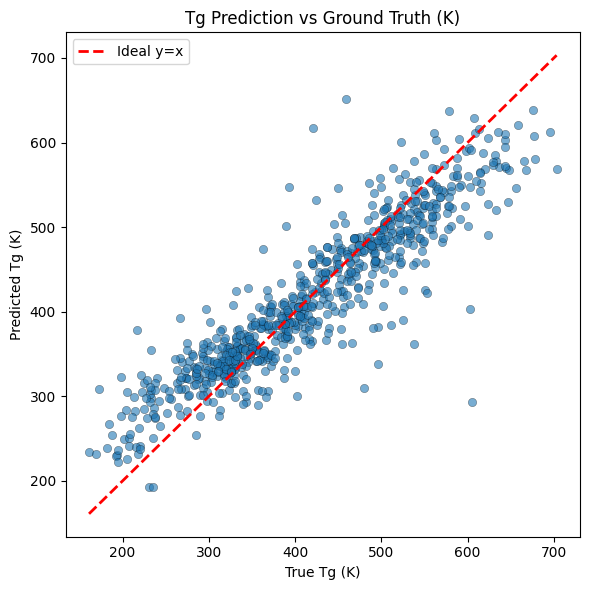

In [62]:
# 训练结束后（或用前面fit函数保存的最优权重）：
save_checkpoint(model, "best_tg_geom.pt")  # 如果已在fit里保存了可略过

# 恢复模型评估（确保通道数与训练一致）
sample = next(iter(train_loader))
in_channels = sample.x.size(1)
edge_in_dim = sample.edge_attr.size(1)

model_eval = load_checkpoint(
    TgRegressorGeom, "best_tg_geom.pt",
    in_channels=in_channels, edge_in_dim=edge_in_dim,
    hidden=128, rbf_dim=16, cutoff=4.5, dropout=0.2
)

# 在验证/测试集做物理单位(K)的推理
y_true, y_pred, mol_ids = predict_in_kelvin(model_eval, test_loader, train_dataset)

# 计算指标
metrics = compute_metrics_K(y_true, y_pred)
print(f"[TEST] MAE: {metrics['MAE_K']:.3f} K | RMSE: {metrics['RMSE_K']:.3f} K")

# 画散点图（自动画 y=x 参照线）
plot_scatter_K(y_true, y_pred, save_path="figs/tg_scatter_test.png")

In [63]:
# （可选）导出 CSV 便于复现或汇报
_ = save_predictions_csv(y_true, y_pred, mol_ids, out_path="results/tg_predictions_test.csv")